<a href="https://colab.research.google.com/github/dataskeptic/Computer-Vision-Task/blob/main/Computer_Vision_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
!pip install opencv-python opencv-contrib-python

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
# Upload files
uploaded = files.upload()

# Assuming you uploaded two image files
filename1, filename2 = uploaded.keys()

Saving dsc08995.jpg to dsc08995 (1).jpg
Saving dsc08994.jpg to dsc08994 (1).jpg


In [ ]:
def sift_features(gray):
    # Create SIFT object
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    return keypoints, descriptors

In [ ]:
def process_image(filename):
    # Read the image
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get keypoints and descriptors using SIFT
    keypoints, descriptors = sift_features(gray)

    # Draw keypoints
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

    return img_with_keypoints, keypoints, descriptors


In [ ]:
def find_correspondences(desc1, desc2):
    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(desc1, desc2)

    # Sort matches in the order of their distance
    matches = sorted(matches, key=lambda x: x.distance)

    return matches

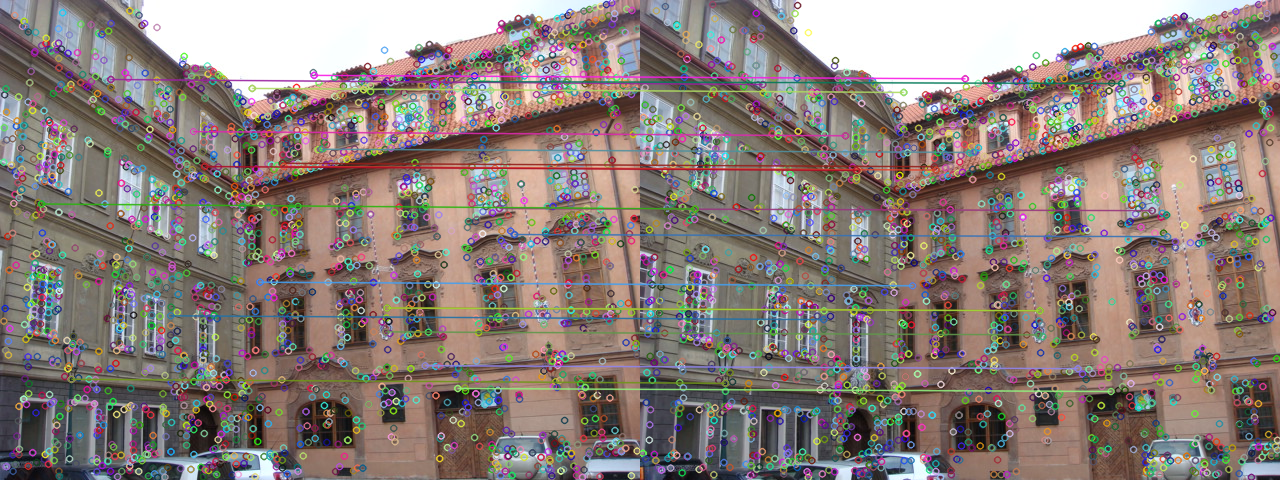

In [ ]:
image1, kp1, desc1 = process_image(filename1)
image2, kp2, desc2 = process_image(filename2)

# Find correspondences
matches = find_correspondences(desc1, desc2)

# Draw first 10 matches
img_matches = cv2.drawMatches(image1, kp1, image2, kp2, matches[:20], None, flags=2)

# Display
cv2_imshow(img_matches)

In [ ]:
def harris_corners(gray):
    # Harris Corner Detection
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=7, k=0.04)

    # Result is dilated for marking the corners
    dst = cv2.dilate(dst, None)

    # Selecting strong corners
    corners = np.where(dst > 0.01 * dst.max())
    keypoints = [cv2.KeyPoint(float(x), float(y), 1) for y, x in zip(*corners)]

    return keypoints

In [ ]:
def sift_descriptors_for_harris_corners(gray, keypoints):
    # Create SIFT object
    sift = cv2.SIFT_create()

    # Compute SIFT descriptors for Harris corners
    keypoints, descriptors = sift.compute(gray, keypoints)

    return keypoints, descriptors

In [ ]:
def process_image(filename):
    # Read the image and convert to grayscale
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect corners using Harris
    harris_keypoints = harris_corners(gray)

    # Compute SIFT descriptors for Harris corners
    keypoints, descriptors = sift_descriptors_for_harris_corners(gray, harris_keypoints)

    # Draw keypoints
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

    return img_with_keypoints, keypoints, descriptors

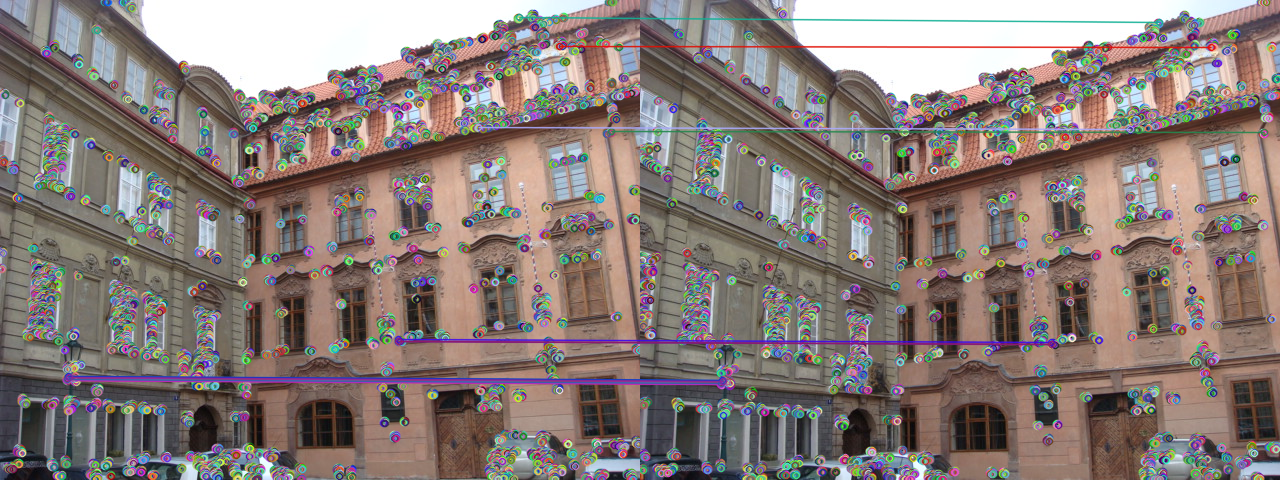

In [ ]:
# Process the first image
image1, kp1, desc1 = process_image(filename1)

# Process the second image
image2, kp2, desc2 = process_image(filename2)

# Find correspondences
matches = find_correspondences(desc1, desc2)

# Draw first 10 matches
img_matches = cv2.drawMatches(image1, kp1, image2, kp2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display
cv2_imshow(img_matches)
